In [1]:
#!pip install wordcloud
#!pip install textblob


In [2]:
from PIL import Image
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [3]:
############# NOTE: topic_modeled_tweets is not updated by April yet! 
topic_modeled = pd.read_csv('../output/topic_modeled_tweets.csv')
#topic_modeled = topic_modeled.iloc[:,2:]
sentiment_analysis_clean = pd.read_csv('C:/Users/Chloe/Downloads/sentiment_analysis_clean.csv')

In [4]:
# if they are retweets: there are retweets in the middle of the text
tweets = topic_modeled['text'].to_list()
values = []

for tweet in tweets:
    if tweet.find('RT @') == -1:
        value = False
    else:
        value = True
    values.append(value)

topic_modeled['RT'] = values

In [5]:
print(len(sentiment_analysis_clean))
print(len(topic_modeled))
print(len(topic_modeled[topic_modeled.RT==False])) #if contains "RT @"
print(len(sentiment_analysis_clean[sentiment_analysis_clean.isRetweet=='f']))
print(len(sentiment_analysis_clean[sentiment_analysis_clean.retweeted==False])) #if startswith "RT"

56571
56571
46487
46694
46869


In [6]:
#topic_modeled = topic_modeled.drop(columns=['id'])
topic_modeled['text_cleaned'] = sentiment_analysis_clean['sentiment_text']
topic_modeled['subjectivity_score'] = sentiment_analysis_clean['subjectivity_score']
topic_modeled['polarity'] = sentiment_analysis_clean['polarity']
topic_modeled['sentiment_vader'] = sentiment_analysis_clean['sentiment_vader']

#topic_modeled.RT = topic_modeled.RT.fillna(False)

In [7]:
[print(topic_modeled.columns[i],'\n',Counter(topic_modeled.iloc[:,i]),'\n','-'*30) for i in [4,5,9,10,11]]

isDeleted 
 Counter({'f': 55479, 't': 1092}) 
 ------------------------------
device 
 Counter({'Twitter for iPhone': 27967, 'Twitter for Android': 14545, 'Twitter Web Client': 12182, 'TweetDeck': 482, 'TwitLonger Beta': 405, 'Twitter Media Studio': 375, 'Instagram': 133, 'Facebook': 105, 'Twitter Ads': 97, 'Twitter for BlackBerry': 97, 'Twitter Web App': 64, 'Twitter for iPad': 60, 'Twitlonger': 23, 'Twitter QandA': 10, 'Vine - Make a Scene': 10, 'Periscope': 7, 'Neatly For BlackBerry 10': 5, 'Media Studio': 2, 'Twitter for Websites': 1, 'Twitter Mirror for iPad': 1}) 
 ------------------------------
isFlagged 
 Counter({'f': 56267, 't': 304}) 
 ------------------------------
Topic 
 Counter({0: 9491, 5: 7769, 3: 6302, 4: 5411, 9: 5398, 2: 5212, 1: 4844, 6: 4280, 7: 4130, 8: 3734}) 
 ------------------------------
RT 
 Counter({False: 46487, True: 10084}) 
 ------------------------------


[None, None, None, None, None]

In [8]:
# drop rows without any valid words
topic_modeled = topic_modeled.iloc[topic_modeled['text_cleaned'].dropna().index,]

In [9]:
# Extract time from date
topic_modeled['date'] = topic_modeled.date.astype('datetime64[ns]')
topic_modeled['time'] = topic_modeled.date.dt.time
topic_modeled['hour'] = pd.to_numeric(topic_modeled.date.dt.hour)

In [10]:
topic_modeled

,Unnamed: 0,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,Topic,RT,text_cleaned,subjectivity_score,polarity,sentiment_vader,time,hour
0,0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,7,False,republicans democrats created economic problems,0.200000,0.200000,-0.1779,18:07:48,18
1,1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,4,False,thrilled back great city charlotte north carol...,0.483333,0.450000,0.9771,01:34:50,1
2,2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,6,True,read letter surveillance court obtained cbs ne...,0.100000,0.100000,0.0000,03:22:47,3
3,3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,4,False,unsolicited mail ballot scam major threat demo...,0.454762,0.029464,-0.9552,20:10:58,20
4,4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,1,True,friendly telling events comey apparent leaking...,0.425000,0.212500,0.4939,13:13:59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56566,56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,7,True,’ know thinks continue lie wants ban fracking ...,0.100000,0.200000,-0.2732,03:46:25,3
56567,56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,3,True,president excels communicating directly americ...,0.000000,0.000000,0.5423,03:42:05,3
56568,56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,1,True,live presidential debate text vote,0.500000,0.136364,0.0000,01:03:58,1
56569,56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,6,False,signed order support workers delphi corporatio...,0.260317,-0.035714,0.0000,21:04:21,21


In [11]:
# save 
topic_modeled.to_csv(r'../output/data_for_analysis.csv', index=False)

## 30 most frequent words in topics

In [12]:
# Old topics
topic_tops = pd.read_csv('../output/topic tops.csv')
# new topics
#topic_tops = pd.read_csv('../output/topic tops without RTs.csv')

In [13]:
# frequency ascending
for i in range(len(topic_tops)):
    print(topic_tops.iloc[i,1])
    print('-'*50)

[['south', 'game', 'korea', 'soon', 'lost', 'hope', 'crowd', 'success', 'florida', 'high', 'making', 'tomorrow', 'nation', 'amazing', 'security', 'big', 'man', 'leader', 'thank', 'record', 'national', 'way', 'best', 'run', 'make', 'donald', 'america', 'realdonaldtrump', 'great', 'trump']]
--------------------------------------------------
[['donaldjtrumpjr', 'men', 'approval', 'event', 'ohio', 'texas', 'golf', 'winning', 'year', 'plan', 'wow', 'way', 'terrible', 'political', 'presidential', 'big', 'thing', 'woman', 'debate', 'nice', 'say', 'congratulation', 'life', 'night', 'trump', 'great', 'medium', 'realdonaldtrump', 'good', 'thank']]
--------------------------------------------------
[['crime', 'wait', 'tariff', 'complete', 'apprenticenbc', 'repo', 'massive', 'hit', 'apprentice', 'endorsement', 'justice', 'case', 'mueller', 'enjoy', 'order', 'washington', 'morning', 'witch', 'hunt', 'coming', 'happy', 'book', 'fbi', 'law', 'foxandfriends', 'strong', 'total', 'great', 'amp', 'thanks

In [14]:
#old topics
#topic_labels = ['Border','FakeNews','','','Whitehouse','Vote','Hillary&Obama','MAGA','','Dems']
#new topics
topic_labels = ['FakeNews','Interviews','Hillary&Obama','Security','China','MAGA','Vote','PresidentTrump','Border','?']

In [15]:
# 'realdonaldtrump' is occurs very frequently in topics
# so check if texts contain 'realdonaldtrump'
tweets = topic_modeled['text'].to_list()
values = []

for tweet in tweets:
    if tweet.find('realdonaldtrump') == -1:
        value = False
    else:
        value = True
    values.append(value)

topic_modeled['realdonaldtrump']= values

In [16]:
print(len(topic_modeled[(topic_modeled.realdonaldtrump==True)]))
print(len(topic_modeled[(topic_modeled.realdonaldtrump==True) & (topic_modeled.RT==False)].text))

125
83


## Heatmap: Tweet topic vs. device

In [17]:
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    inputs
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.

    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #         rotation_mode="anchor")

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [18]:
# device variable
device_val= list(sorted(Counter(topic_modeled.device).keys()))

counts=[]
for i in device_val:
    counts.append([i, sum(Counter(topic_modeled[topic_modeled.device==i]["Topic"]).values())])
df = pd.DataFrame(counts, columns=['device','counts'])#.sort_values(by='counts',ascending=False)[:10]
# Filters devices with 100+ tweets 
device_val=list(df[df.counts > 100].device)

In [19]:
# (target) topic variable
topic_val = list(sorted(Counter(topic_modeled.Topic).keys()))

In [20]:
# heatmap matrix

a = np.empty((0,len(topic_val)),int)
for i in device_val:
    counter = Counter(topic_modeled[topic_modeled.device==i]["Topic"])
    row = np.array([dict(counter).get(key, 0) for key in topic_val]).reshape(-1,10)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

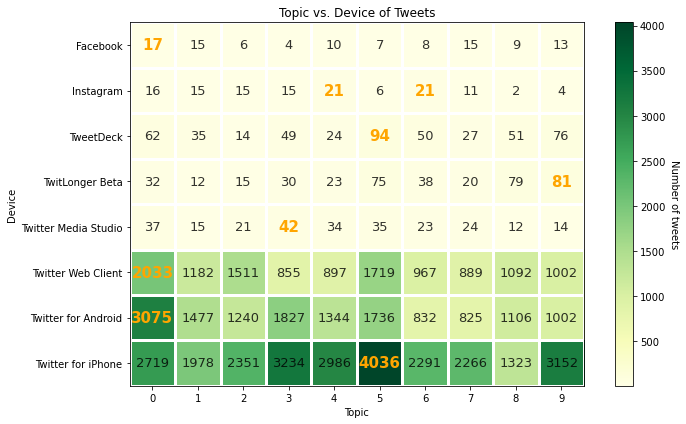

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

im, cbar = heatmap(a, device_val, topic_val, ax=ax,
                   cmap="YlGn", cbarlabel="Number of tweets")
#texts = annotate_heatmap(im, valfmt="{}")
# Loop over data dimensions and create text annotations.
for i in range(len(device_val)):
    for j in range(len(topic_val)):
        if a[i,j] == np.max(a, axis=1)[i]:
            text = ax.text(j, i, a[i, j],fontsize=15, 
                       ha="center", va="center", color="orange", weight="bold")
        else:
            text = ax.text(j, i, a[i, j],fontsize=13,
                       ha="center", va="center", color="black",alpha=0.8)
ax.set_title("Topic vs. Device of Tweets")
ax.set_xlabel("Topic")
ax.set_ylabel("Device")
fig.tight_layout()
plt.show()

## Heatmap: Topics of Deleted/Undeleted Tweets

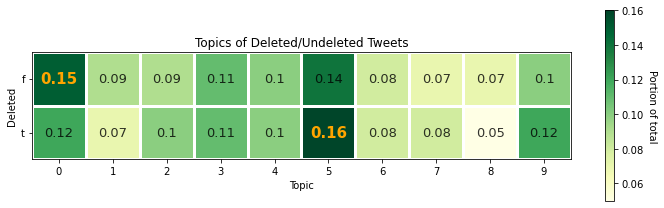

In [22]:
isdelete_val= list(sorted(Counter(topic_modeled.isDeleted).keys()))
# heatmap matrix

a = np.empty((0,len(topic_val)),int)
for i in isdelete_val:
    counter = Counter(topic_modeled[topic_modeled.isDeleted==i]["Topic"])
    row = np.array([dict(counter).get(key, 0) for key in topic_val]).reshape(-1,10)
    row = np.round(row/np.sum(row), decimals=2)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

fig, ax = plt.subplots(figsize=(10,3))

im, cbar = heatmap(a, isdelete_val, topic_val, ax=ax,
                   cmap="YlGn", cbarlabel="Portion of total")
#texts = annotate_heatmap(im, valfmt="{}")
# Loop over data dimensions and create text annotations.
for i in range(len(isdelete_val)):
    for j in range(len(topic_val)):
        if a[i,j] == np.max(a, axis=1)[i]:
            text = ax.text(j, i, a[i, j],fontsize=15, 
                       ha="center", va="center", color="orange", weight="bold")
        else:
            text = ax.text(j, i, a[i, j],fontsize=13,
                       ha="center", va="center", color="black",alpha=0.8)
ax.set_title("Topics of Deleted/Undeleted Tweets")
ax.set_xlabel("Topic")
ax.set_ylabel("Deleted")
fig.tight_layout()
plt.show()

## WordCloud for each topic

In [23]:
delete = topic_modeled[topic_modeled.isDeleted=='t'].text_cleaned
len(delete)

1035

In [24]:
import cv2
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "figs\\")

# create image mask
img_grey = cv2.imread('../figs/trump.png', cv2.IMREAD_GRAYSCALE)
thresh = 240
# threshold the image
img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
#save image
cv2.imwrite(os.path.join(path, "trump_mask.png"),img_binary) 

True

In [25]:
trump_mask = np.array(Image.open(os.path.join(path, "trump_mask.png")))
trump = np.array(Image.open(os.path.join(path, "trump.png")))
image_colors = ImageColorGenerator(trump)

In [26]:
stopwords = set(STOPWORDS)
overused = ['thank','thanks','president','new','big','nice','like','time','year','years','know','think','thought',
            'want','good','little','never','wants','want','thing','follow','followed','go','going','way',
            'see','saw','high','low','say','says','day','today','different','realdonaldtrump','amp']
for i in overused:
    stopwords.add(i)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_wordcloud(topic=0, topic_label=''):
    freq_dict = dict(get_top_n_words(topic_modeled[topic_modeled.Topic==topic].text_cleaned))
    for i in stopwords:
        if i in freq_dict:
            freq_dict.pop(i)
    wordcloud = WordCloud(font_path='../data/Candara.ttf',
                        background_color='white',
                        max_words=100,
                        max_font_size=100, 
                        mask=trump_mask,
                        random_state=100).generate_from_frequencies(freq_dict)
    fig = plt.figure(figsize=(8,8))
    #plt.imshow(wordcloud)
    plt.imshow(wordcloud.recolor(color_func=image_colors))#, interpolation="bilinear")
    plt.axis('off')
    plt.title('Topic {}: {}'.format(topic,topic_label))
    plt.show()

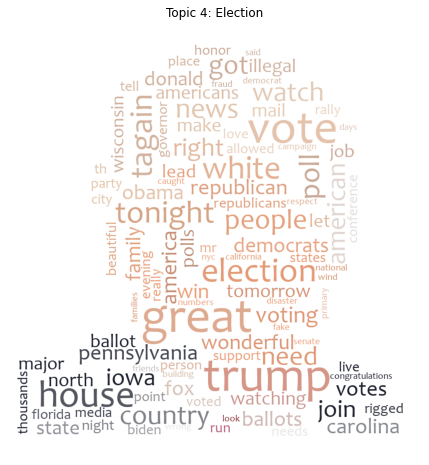

In [28]:
plot_wordcloud(topic=4, topic_label='Election')#, topic_label = topic_labels[4])

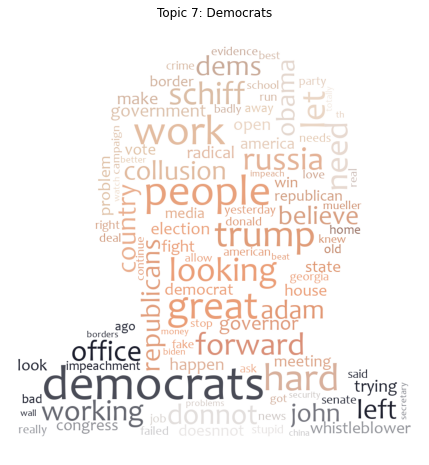

In [29]:
plot_wordcloud(topic=7, topic_label='Democrats')#, topic_label = topic_labels[7])

## Effects of topics

In [30]:
avg_retweets = topic_modeled.groupby('Topic')['retweets'].agg(np.mean)
avg_favorites = topic_modeled.groupby('Topic')['favorites'].agg(np.mean)
ratio = avg_retweets/avg_favorites
#ratio = list(ratio)

df = np.array([list(avg_retweets), list(avg_favorites), list(ratio)])
topic_summary = pd.DataFrame(df.T, columns=['avg_retweets','avg_favorites','retweets_favorites_ratio'])

In [31]:
topic_summary.sort_values(by='retweets_favorites_ratio', ascending=False)

,avg_retweets,avg_favorites,retweets_favorites_ratio
3,7291.952545,19327.237110,0.377289
8,6439.466828,19188.626483,0.335588
7,10167.036027,31398.063535,0.323811
6,9775.341629,30596.906316,0.319488
9,10564.540566,33996.596018,0.310753
4,9239.343721,30335.172324,0.304575
1,6487.332000,22040.048211,0.294343
2,7147.780089,24385.328134,0.293118
0,5683.698982,20136.650074,0.282256
5,10528.016897,40107.164968,0.262497


Topic #3 has higher retweets/favorites ratio; topic #5 has the highest average favorites; topics 0 and 8 have lower average retweets

In [ ]:
# Not finished

(array([2.5200e+02, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.4000e+01, 5.0000e+00, 1.2000e+01, 3.0000e+00, 3.0000e+00,
        1.4300e+02, 1.0000e+00, 5.4000e+01, 2.0000e+00, 2.4000e+01,
        2.0800e+02, 2.4000e+01, 3.4000e+01, 1.1000e+01, 1.1000e+01,
        2.2000e+02, 2.7000e+01, 5.1000e+01, 5.9000e+01, 1.4000e+01,
        7.7600e+02, 4.5000e+01, 9.0000e+01, 1.0100e+02, 8.1000e+01,
        4.2100e+02, 1.2500e+02, 2.3400e+02, 2.4100e+02, 4.6700e+02,
        2.4800e+02, 1.8400e+02, 5.8200e+02, 2.3300e+02, 6.7700e+02,
        2.3600e+02, 4.4700e+02, 3.9800e+02, 4.8300e+02, 7.9000e+02,
        4.0200e+02, 4.6600e+02, 6.3100e+02, 4.7400e+02, 2.8700e+02,
        1.6175e+04, 5.3700e+02, 7.5000e+02, 7.8400e+02, 1.4670e+03,
        4.1600e+02, 1.3480e+03, 6.2900e+02, 8.0200e+02, 3.3700e+02,
        2.5960e+03, 5.3100e+02, 1.2280e+03, 6.6300e+02, 1.0350e+03,
        5.5200e+02, 5.3600e+02, 1.1080e+03, 5.6900e+02, 1.7020e+03,
        2.2500e+02, 4.7900e+02, 4.6400e+02, 3.66

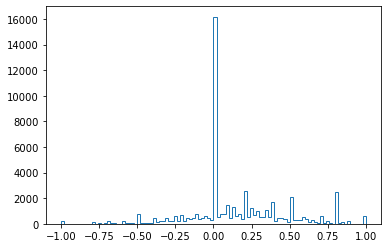

In [32]:
plt.hist(topic_modeled['polarity'], 100, histtype='step', stacked=True, fill=False)